In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale = 2)
import os

In [3]:
Years = pd.read_csv('./GCAM_full/20220421_gcam_production.csv')
Years = Years.columns.values.tolist()[5:-1] ## string
# Scenario = pd.read_csv('./GCAM_full/20220421_gcam_production.csv', usecols=['scenario']).squeeze().unique().tolist()[0:-1]

Trucks = [0.5, 1, 5, 10]
Barges = [0.5, 1, 5, 10]
Rails = [0.5, 1, 5, 10]
Oceans = [0.5, 1, 5, 10]

def sameRate():
    rates = []
    for truck in Trucks:
        for barge in Barges:
             for rail in Rails:
                for ocean in Oceans:
                    if truck == barge == rail == ocean:
                        rates_text = str(truck) + '_' + str(barge) + '_' + str(rail) + '_' + str(ocean)
                        #print(rates_text)
                        rates.append(rates_text)
    rates.insert(2, '1_5_5_5')
    rates.insert(3, '1_5_5_10')
    rates.insert(3, '1_5_10_10')
    rates.insert(3, '1_10_10_10')
    print(rates)
    return rates

scenario = 'SSP3'
root = './Exps/'

In [4]:
#Rates = sameRate()
Rates= ['0.5_1_1_1', '1_1_1_1', '1_5_1_1', '1_1_5_1', '1_1_1_5', '1_1_1_10']
data = pd.DataFrame()
for year in Years:
    path = root + scenario + '/'
    data0 = pd.read_csv(path + 'all_rates_'+ year + '.csv').query('Rates == @Rates')
    data = pd.concat([data,data0])
data['Inventory'] = data['Total_production'] - data['Quantity_X_Facility']- data['Quantity_X_Country_Stream'] - data['Quantity_X_Country_Rail']
data

,Scenario,Year,Rates,OBJ_vaules,Cost_Farmers,Cost_Barges,Cost_Rails,Cost_Oceans,Total_production,Quantity_X_Facility,Quantity_X_Country_Stream,Quantity_X_Country_Rail,Quantity_Y_Stream_Export,Quantity_Y_Rail_Export,Quantity_Z_Export_Import,Demand,Inventory
21,SSP3,1990,0.5_1_1_1,1881930961902,671974853151,135466417146,213642224045,856901778443,37099777725,11129933317,5651663213,13911907974,5651663213,13911907974,19563571187,9414617,6406273221
85,SSP3,1990,1_1_1_1,2221480481426,981285326671,198404090470,179979608292,857865766878,37099777725,11129933317,7981387186,11582184001,7981387186,11582184001,19563571187,9414617,6406273221
86,SSP3,1990,1_1_1_5,5554968115355,1017022244916,153219890540,323717242388,4057063048394,37099777725,11129933317,6091644664,13471926522,6091644664,13471926522,19563571187,9414617,6406273222
87,SSP3,1990,1_1_1_10,9563087467090,1112486038747,57853226251,432327498348,7956475014628,37099777725,11129933317,2112944410,17450626776,2112944410,17450626776,19563571187,9414617,6406273222
89,SSP3,1990,1_1_5_1,2463679338641,1065419798837,487009538334,15334351195,891969961159,37099777725,11129933317,18832543084,731028103,18832543084,731028103,19563571187,9414617,6406273221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,SSP3,2100,1_1_1_1,8467781382974,3496863633896,778839956301,688494084432,3334146961985,136073413732,40822024119,31427545947,44514507882,31427545947,44514507882,75942053830,4555876468,19309335784
86,SSP3,2100,1_1_1_5,21411420284730,3631579726266,606241396509,1239317487256,15764844928339,136073413732,40822024119,24265470235,51676583594,24265470235,51676583594,75942053830,4555876468,19309335784
87,SSP3,2100,1_1_1_10,36983142020032,3997343615602,237705204897,1658171173604,30920485279569,136073413732,40822024119,8890128651,67051925179,8890128651,67051925179,75942053830,4555876468,19309335783
89,SSP3,2100,1_1_5_1,9387549339383,3802384137275,1869172897598,57528712231,3489026845919,136073413732,40822024119,72636805819,3305248010,72636805819,3305248010,75942053830,4555876468,19309335784


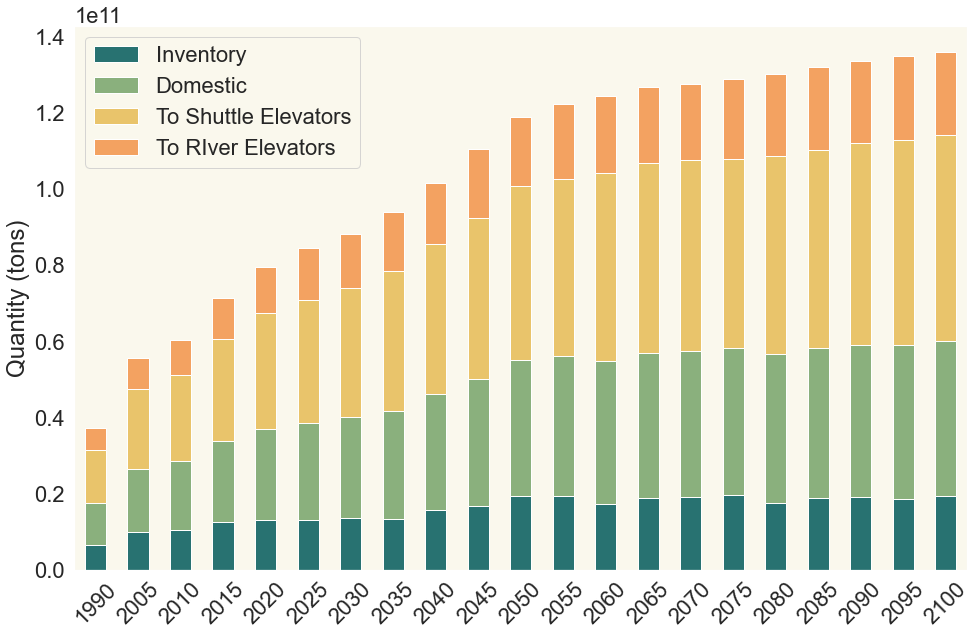

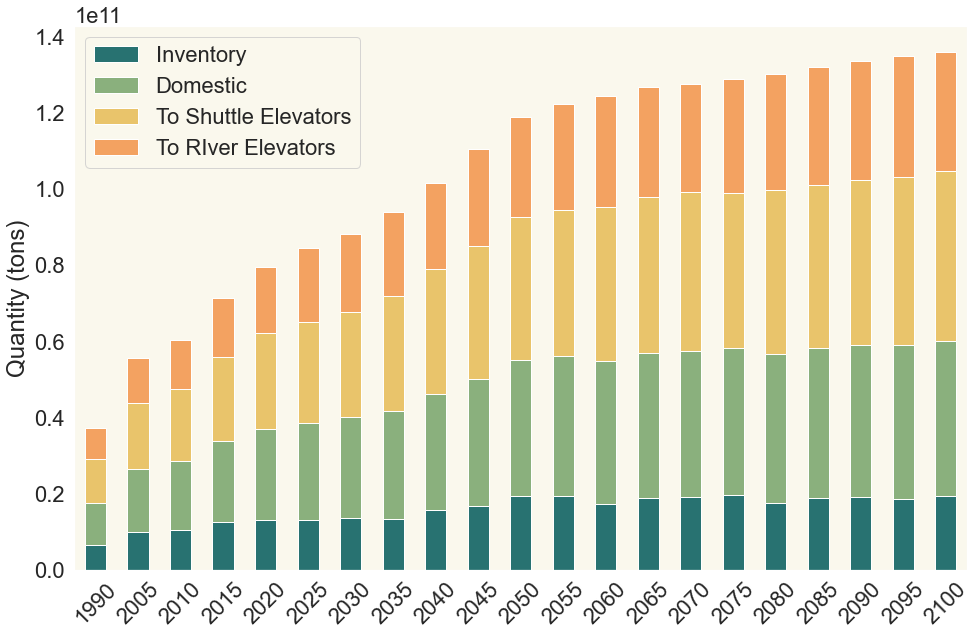

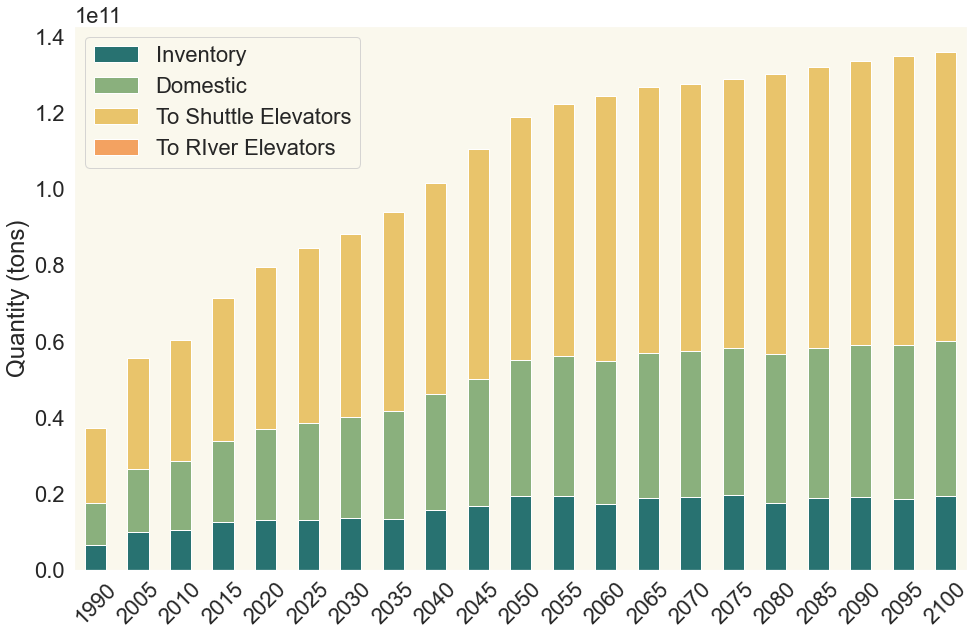

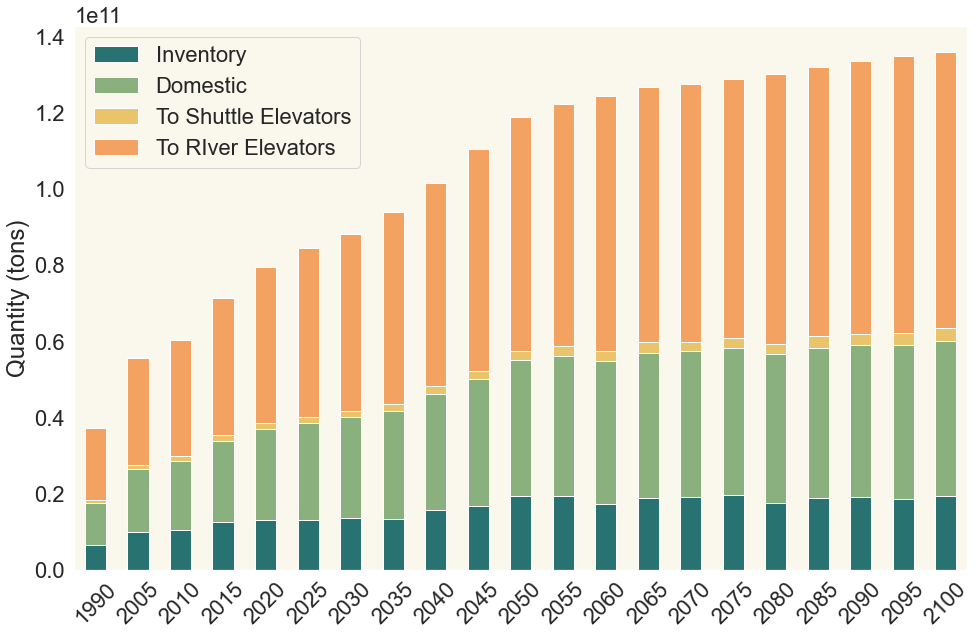

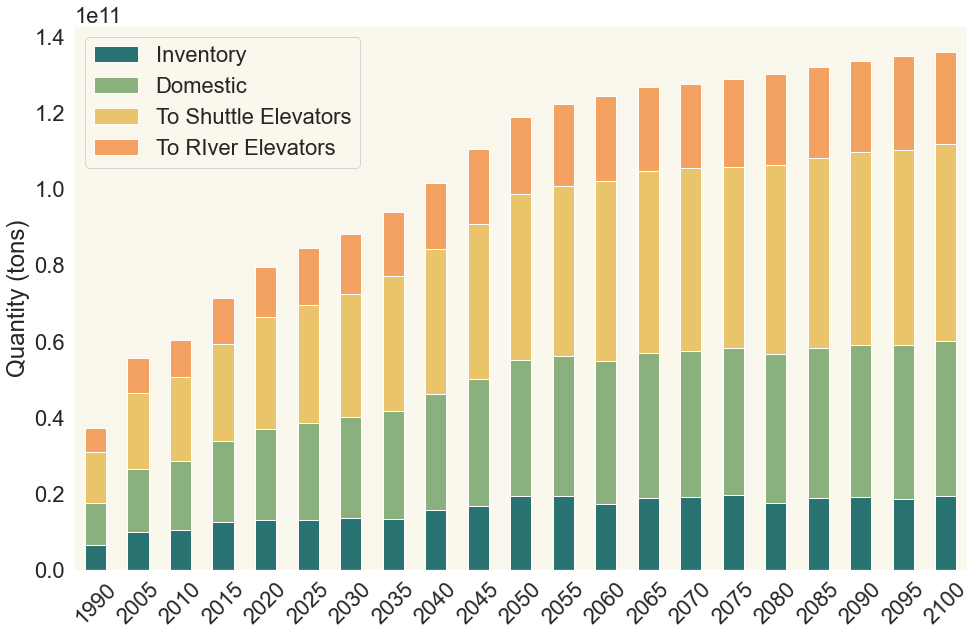

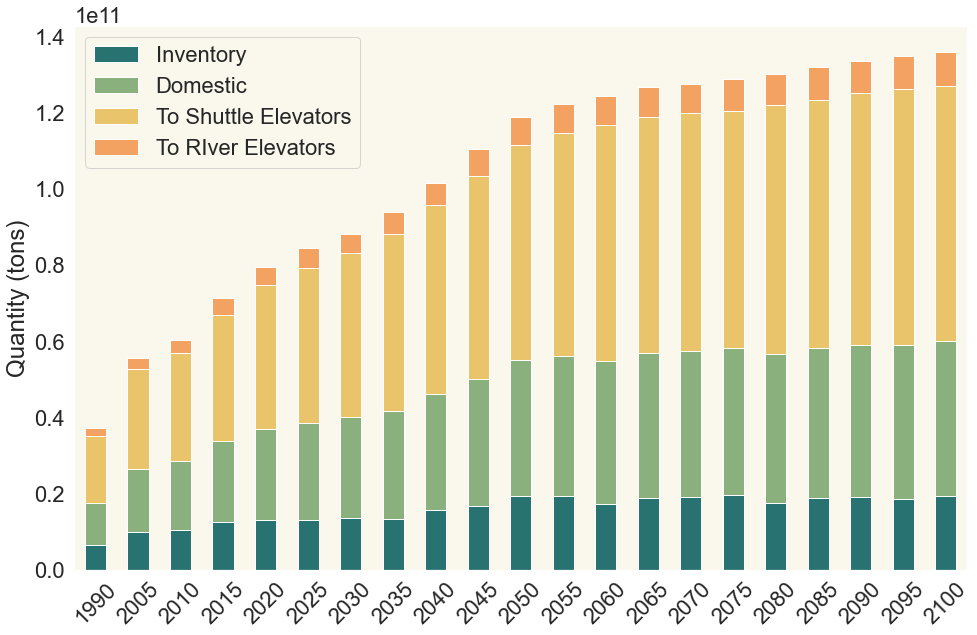

In [6]:
labels = ['Inventory', 'Domestic', 'To Shuttle Elevators', 'To RIver Elevators']
root = os.path.abspath('.')
path = root + '\Figs\\'
for col, rate in enumerate(Rates):
    fig, ax = plt.subplots(1, sharex='col', sharey='row', figsize=(16,10))
    data0 = data.query('Rates == @rate')
    data0 = data0[['Year','Inventory', 'Quantity_X_Facility', 'Quantity_X_Country_Rail', 'Quantity_X_Country_Stream']].set_index('Year', drop=True)
    data0.plot.bar(stacked=True, ax=ax, color=['#287271','#8ab07d','#e9c46b','#f3a261'])

    ax.set_facecolor('#faf8ed')
    #ax.set_title(rate, pad=10)
    ax.set_ylabel('Quantity (tons)')
    ax.grid(False)
    ax.legend(labels=labels, ncol=1, facecolor='#faf8ed')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set(xlabel=None)

    fig.savefig(path + 'Quantity_{}.pdf'.format(rate), dpi=300, bbox_inches="tight")


AttributeError: 'Rectangle' object has no property 'colors'

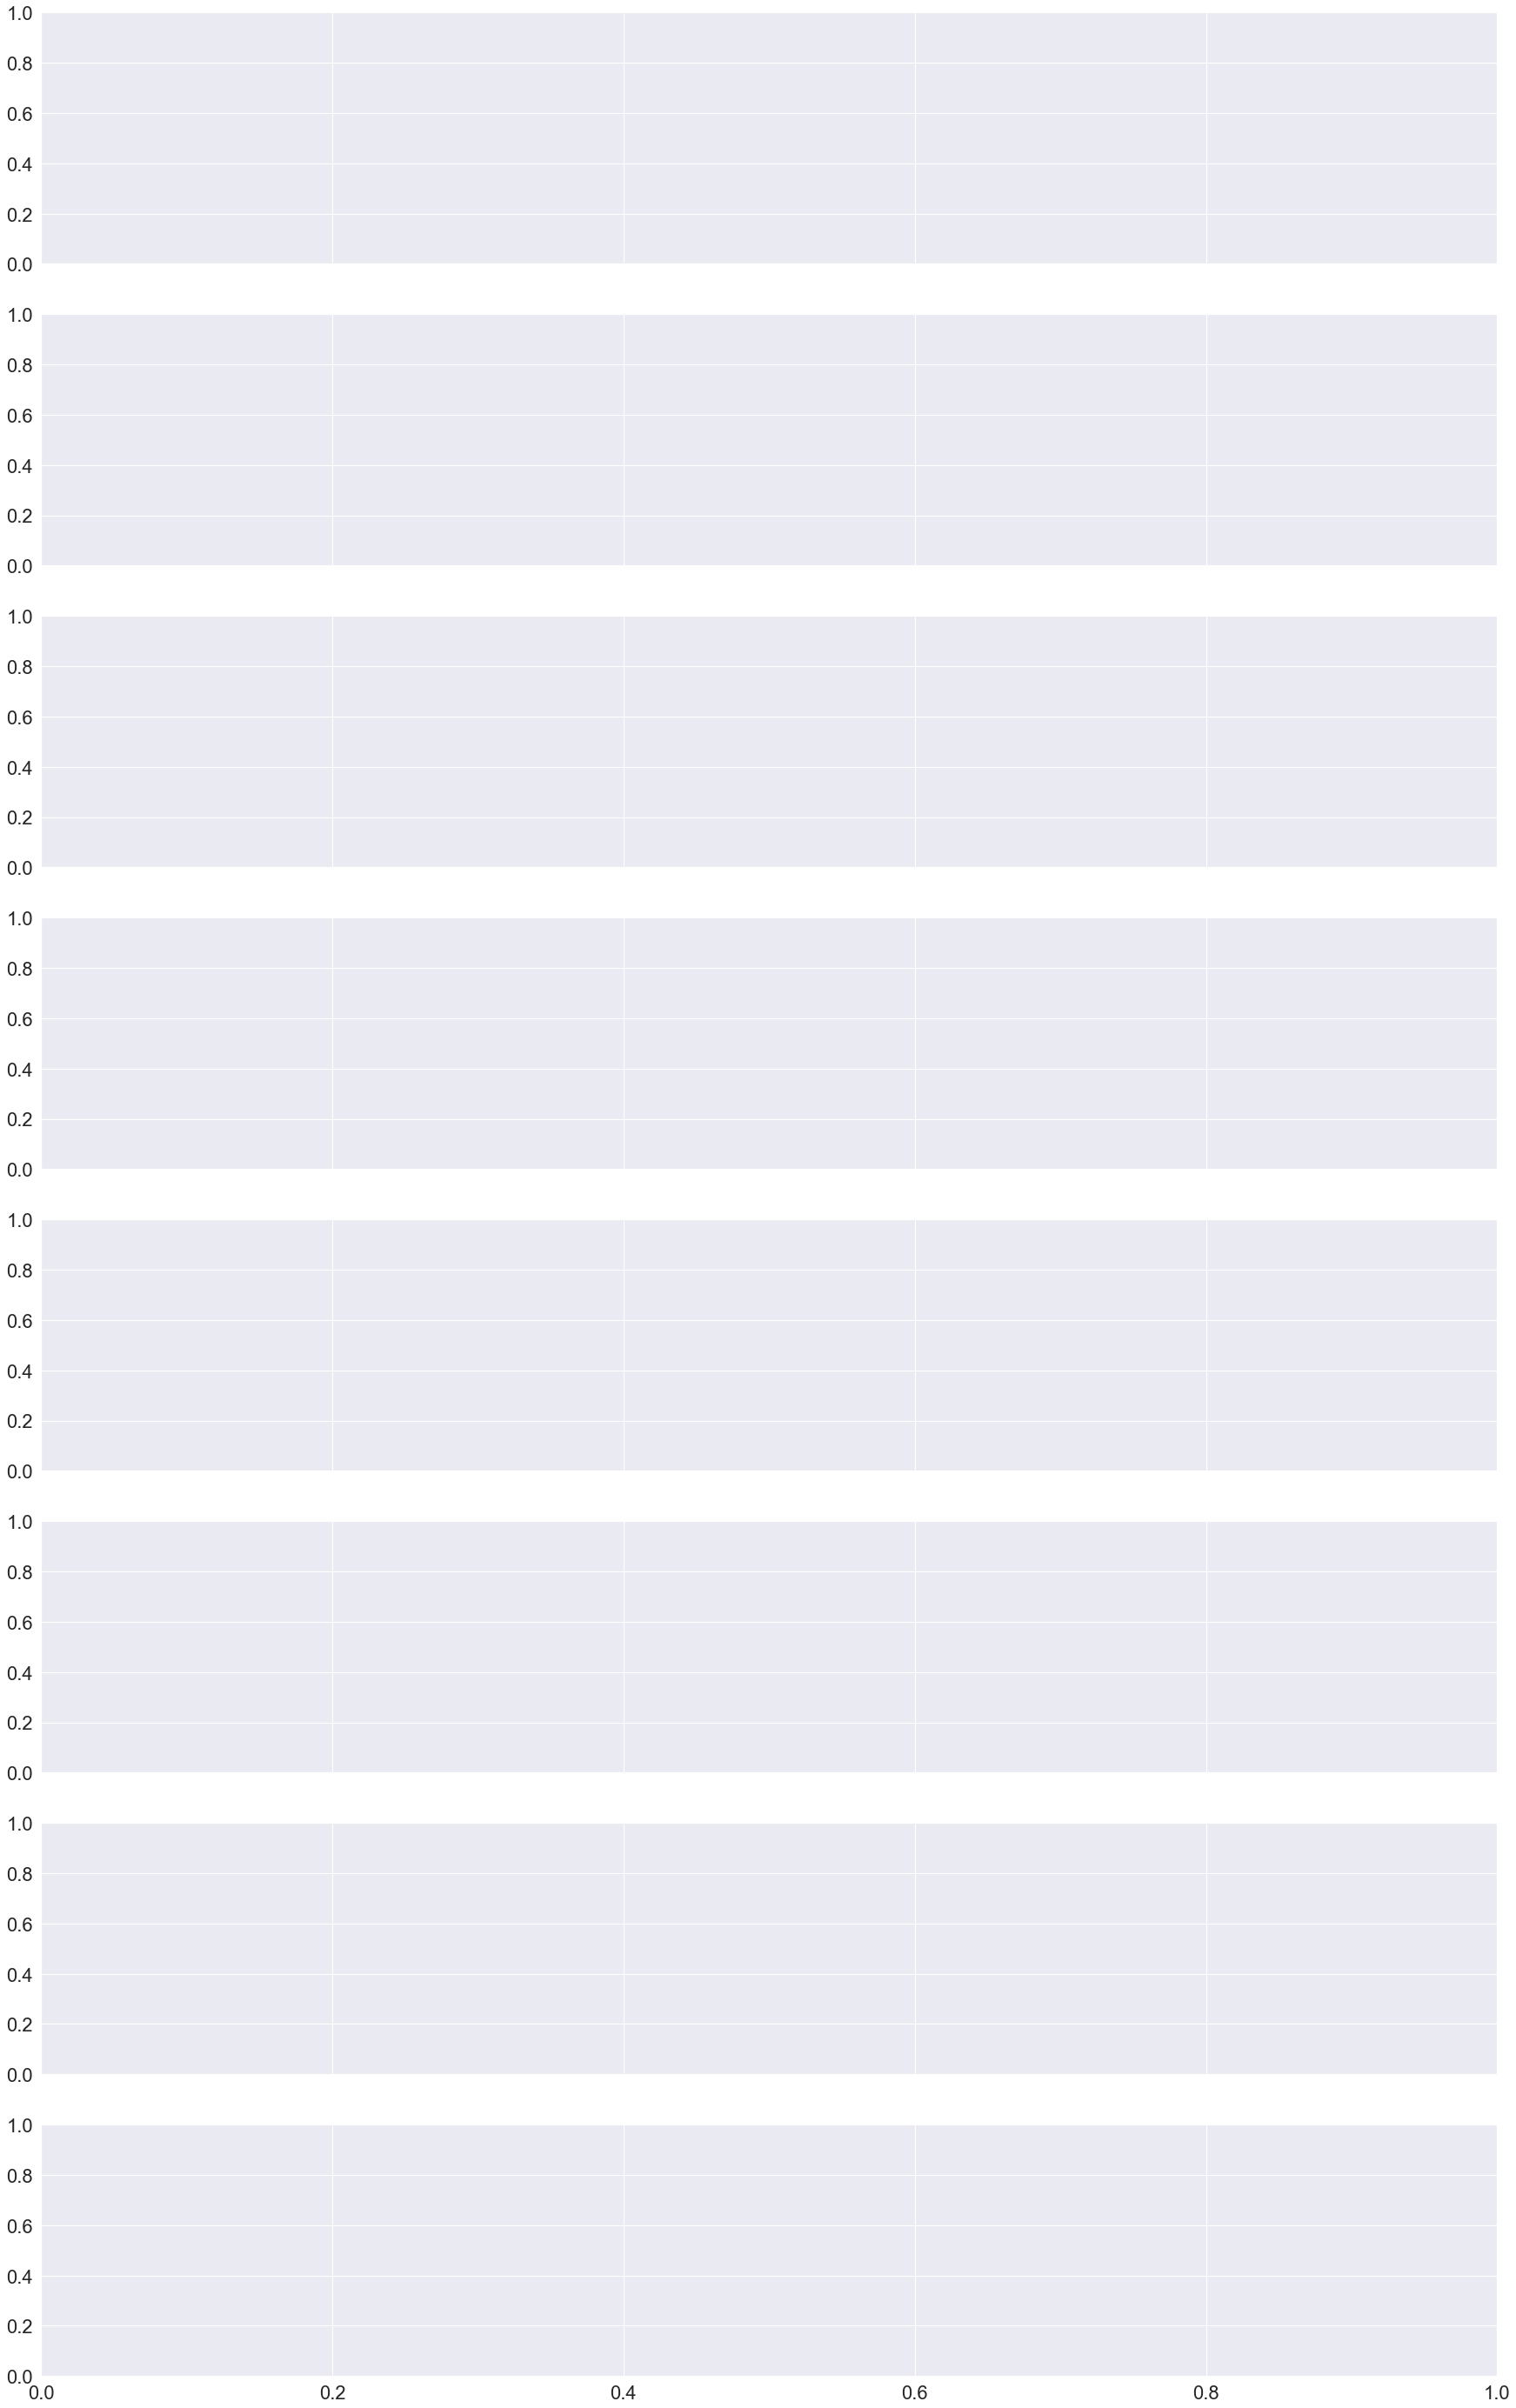

In [5]:
fig, ax = plt.subplots(8, 1, sharex='col', sharey='row', figsize=(30,50))
for col, rate in enumerate(Rates):
    data0 = data.query('Rates == @rate')
    data0.plot(x='Year', y='Inventory', kind='bar', ax=ax[col], label='Inventory', colors=['#287271'])
    data0.plot(x='Year', y='Quantity_X_Facility', kind='bar', ax=ax[col], bottom=data0['Inventory'], label='Domestic')
    data0.plot(x='Year', y='Quantity_X_Country_Rail', kind='bar', ax=ax[col], bottom=data0['Quantity_X_Facility'], label='Global_by_Rail')
    data0.plot(x='Year', y='Quantity_X_Country_Stream', kind='bar', ax=ax[col],  bottom=data0['Quantity_X_Country_Rail'], label='Global_by_River')